Analysis on the hard questions selected in pick_hard_questions.ipynb

In [1]:
### 
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '..')
from analysis.analysis_utils import *
from analysis.plot_utils import *
import pandas as pd
from datasets import load_dataset
from collections import Counter

In [65]:
all_df = prepare_df()

/Users/joshlevy/projects/llm_judge_debate_NEW/analysis/../analysis/analysis_utils.py:87: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(aligned_dfs, ignore_index=True)
/Users/joshlevy/projects/llm_judge_debate_NEW/analysis/../analysis/analysis_utils.py:87: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(aligned_dfs, ignore_index=True)


In [66]:
dataset = load_dataset('Idavidrein/gpqa', 'gpqa_diamond')['train']
dataset_df = dataset.to_pandas()
dataset_df = dataset_df.rename({'Question': 'question', 'High-level domain': 'high_level_domain'}, axis=1)

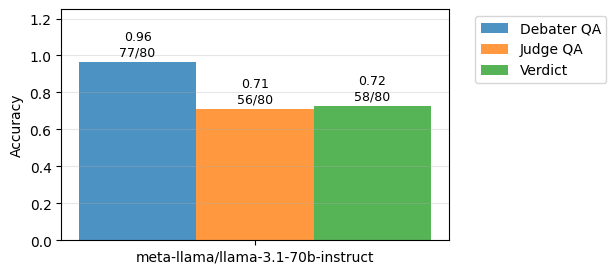

In [74]:
# single_verdict = ['v4qctag'] # gpt4o-mini verdict on 10 grok-4-fast debates 
# single_verdict = ['cza834y'] # gpt4o-mini verdict on 10 gtp4o-mini debates (control)
# single_verdict = ['p4k6xac']  #  # gpt4o-mini verdict on 20 grok-4-fast debates (test)
# single_verdict = ['2wcb5do'] # gpt4o-mini verdict on 20 gtp4o-mini debates (control, test)
# single_verdict = ['co9f3lh'] # llama-3.1-70b 
# single_verdict = ['8xmkbxc']  # llama-3.1-8b on all question with the new prompts
single_verdict = ['s89e0zg'] # llama-3.1-70b
verdicts_df = all_df[all_df['verdict_run_id_verdicts'].isin(single_verdict)]

verdicts_df = verdicts_df.merge(dataset_df[['question', 'high_level_domain']], left_on=['question_verdicts'], right_on=['question'], how='left', suffixes=('', '_dataset'))
# verdicts_df = verdicts_df[verdicts_df['high_level_domain'] == 'Chemistry']
verdicts_df = verdicts_df[verdicts_df['high_level_domain'] == 'Physics']

# verdicts_df = verdicts_df[verdicts_df['has_leak_debate_checks'] == False]

acc_gpqa = aggregate_by_fields(verdicts_df, ['config_judge_model_verdicts'])


ax, plt = plot_accuracy_bars_single(acc_gpqa, show_sig=True)

plt.show()

In [35]:
temp_df = verdicts_df.copy()
temp_df = temp_df[(temp_df['is_correct_qa_debater'] == True) & (temp_df['is_correct_qa_judge'] == True) & (temp_df['is_correct_verdict'] == False)]
temp_df[['verdict_run_id_verdicts', 'record_id_verdicts']]


,verdict_run_id_verdicts,record_id_verdicts
17424,p4k6xac,v16mxdb


In [36]:
temp_df[['is_correct_qa_debater', 'is_correct_qa_judge', 'is_correct_verdict']]

,is_correct_qa_debater,is_correct_qa_judge,is_correct_verdict
17424,True,True,False


In [20]:
# increase widht of pandas column
import textwrap
from IPython.display import HTML
pd.set_option('display.max_colwidth', 40)
verdicts_df['reasoning_wrapped'] = verdicts_df['parsed_reasoning_verdicts'].apply(lambda x: '<br>'.join(textwrap.wrap(str(x), width=60)) if pd.notna(x) else x)

HTML(verdicts_df[['reasoning_wrapped', 'question_idx_debates', 'verdict_run_id_verdicts', 'record_id_debates', 'is_correct_verdict']].to_html(escape=False))

/var/folders/9l/xmd1jn1s1gg47vfyv_n8g3xh0000gn/T/ipykernel_31271/2381179894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verdicts_df['reasoning_wrapped'] = verdicts_df['parsed_reasoning_verdicts'].apply(lambda x: '<br>'.join(textwrap.wrap(str(x), width=60)) if pd.notna(x) else x)


,reasoning_wrapped,question_idx_debates,verdict_run_id_verdicts,record_id_debates,is_correct_verdict
17410,"Debater 1's arguments are well-grounded in establishedphysics principles regarding electrostatic potential energy,effectively countering Debater 0's claims about the totalenergy calculation. The reliance on standard formulas andliterature supports their position, leading to theconclusion that Debater 1 is correct.",179.0,v4qctag,ieag73g,True
17411,Debater 1 presents a more compelling case with verifiablecalculations and alternative salt identities that fit theobserved data better than Debater 0's claims. The overallanalysis indicates that Debater 1's arguments are strongerand more consistent with the evidence provided. ANSWER>,63.0,v4qctag,mhodx1b,False
17413,"Debater 0 presents a well-supported argument with cleargrounding and effectively counters Debater 1's claims, whileDebater 1's arguments are less convincing and rely onspeculative mechanisms.",97.0,v4qctag,zcyj6vn,True
17414,"Debater 0 presents a more compelling argument regarding theinversion of Ct values, which is the main issue at hand,while Debater 1's focus on replicate deviation does notadequately address this core discrepancy. ANSWER>",92.0,v4qctag,52r5rd5,True
17415,"Debater 1 provided specific citations and a coherentargument regarding the sulfur bridge in the Diels-Alderproduct, while Debater 0's claims about the oxygen bridgewere less substantiated and relied on more generalreferences.",32.0,v4qctag,52c44io,True
17416,"Debater 0 effectively supports their claim with calculationsand verifiable examples of successful detections at z=1.9,while Debater 1's arguments, although strong, do notadequately address the specific evidence presented byDebater 0.",129.0,v4qctag,adv4zjn,True
17417,"Debater 0 consistently presents a strong, verifiableargument based on a fixed phase assumption, while Debater1's claims about dynamic phase and average slip lacksufficient grounding and evidence. The calculations providedby Debater 0 are clear and verifiable, leading to a decisiveconclusion in their favor.",136.0,v4qctag,cm0fxb6,True
17418,"Debater 0 consistently provided stronger, more precisearguments supported by solid grounding, while Debater 1relied on approximations that did not adequately address theproblem's requirements for precision. The overall analysisindicates that Debater 0 is the one telling the truth. FINAL ANSWER>",123.0,v4qctag,l4yct6o,True
